In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_test = pd.read_csv("test-full.csv")
df_train = pd.read_csv("train.csv")
# pour avoir cover type au début
df_train = df_train[[df_train.columns[-1]] + list(df_train.columns[0:-1])]

In [4]:
df_train.shape, df_test.shape

((15120, 56), (581012, 55))

In [5]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train["Cover_Type"].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

### Basis script

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target 
X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Creating a Test dataset
X_test = df_test

# Make predictions on the test dataset
y_pred = clf.predict(X_test)

# Saving predictions to a CSV file
predictions_df = pd.DataFrame({'Cover_Type': y_pred})

# Having it fit the desired format
Id = [i for i in range (1, 581013)]
predictions_df['Id'] = Id
# predictions_df.to_csv('test_predictions.csv', index=False) # peut-être plus simple de directement mettre index = True


In [8]:
predictions_df["Cover_Type"].value_counts()

2    236112
1    216326
3     38178
7     31667
5     28425
6     26278
4      4026
Name: Cover_Type, dtype: int64

### First train-test

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Si on met que la df en input
def RF_classif(df_train=df_train):
    
    if "Wilderness_Area_Synth" in df_train.columns:
        df_train = df_train.drop(columns="Wilderness_Area_Synth")

    
    # Separate features and target 
    X_train = df_train.drop('Cover_Type', axis=1)
    y_train = df_train['Cover_Type']

    data_train, data_test, target_train, target_test = train_test_split(
        X_train, y_train, test_size = 0.2
    )

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

# Si test & train déjà définis
def RF_classif_train_test(data_train, target_train, data_test, target_test):

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

In [6]:
y_true, y_pred = RF_classif()
accuracy_score(y_true, y_pred) # bien meilleur score que sur Kags

0.8822751322751323

In [10]:
pd.DataFrame(sorted(np.stack([clf.feature_names_in_, clf.feature_importances_* 100]).T, key=lambda x: x[1], reverse=True))

,0,1
0,Elevation,20.632355
1,Id,13.322041
2,Horizontal_Distance_To_Roadways,8.330502
3,Horizontal_Distance_To_Fire_Points,6.130473
4,Horizontal_Distance_To_Hydrology,4.918169
5,Wilderness_Area4,4.871603
6,Vertical_Distance_To_Hydrology,4.423837
7,Hillshade_9am,4.357751
8,Aspect,4.033937
9,Hillshade_3pm,3.803219


In [11]:
print(classification_report(y_true, y_pred))

# On prédit moins bien 1 et 2, ce qui est un problème pcq représentent une immense majorité du dataset final

              precision    recall  f1-score   support

           1       0.79      0.76      0.78       437
           2       0.82      0.72      0.77       450
           3       0.88      0.86      0.87       436
           4       0.94      0.99      0.96       410
           5       0.91      0.95      0.93       430
           6       0.86      0.88      0.87       419
           7       0.91      0.97      0.94       442

    accuracy                           0.87      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [12]:
a = pd.DataFrame(pd.DataFrame(y_true).value_counts(), columns=["True"])
b = pd.DataFrame(pd.DataFrame(y_pred).value_counts(), columns=["Pred"])

a.loc[range(1,8)], b.loc[range(1,8)]    #### ON A TENDENCE A SOUS PREDIRE 2, pq ????

(            True
 Cover_Type      
 1            437
 2            450
 3            436
 4            410
 5            430
 6            419
 7            442,
    Pred
 0      
 1   422
 2   395
 3   426
 4   433
 5   450
 6   428
 7   470)

# Looking into the data

<Axes: >

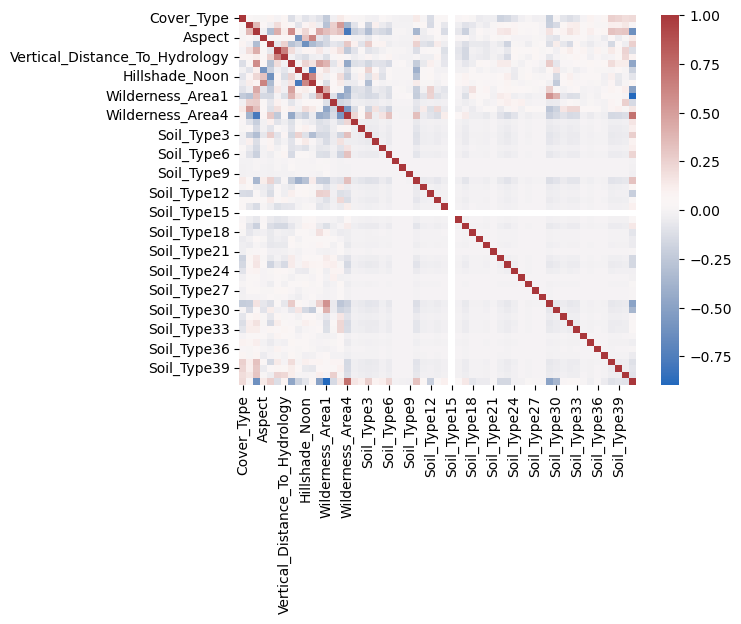

In [127]:
sns.heatmap(df_train.corr(), cmap = 'vlag') ## sans les soils sinon illisble

# Unsupervised (sans les soil types)

<Axes: >

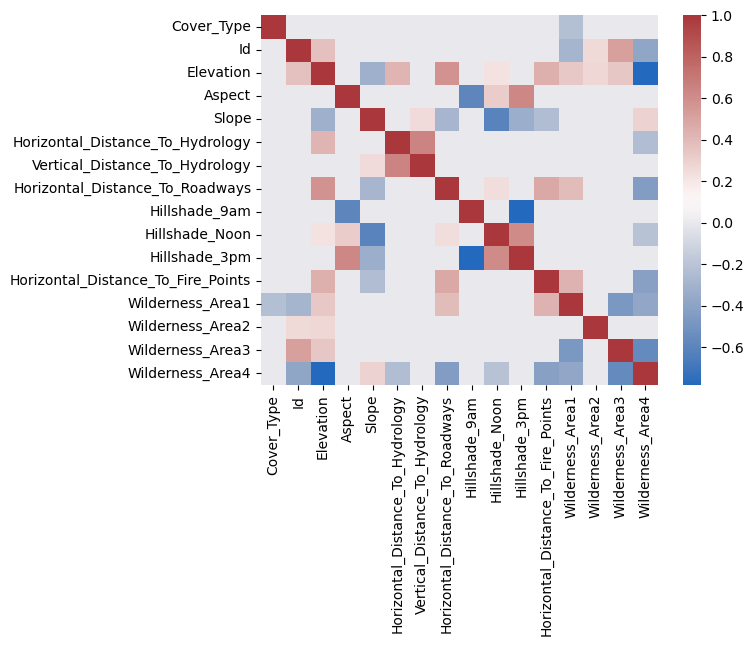

In [128]:
df_train_nosoil = df_train.iloc[:,:16]


sns.heatmap((abs(df_train_nosoil.corr()) > 0.2) * df_train_nosoil.corr(), cmap='vlag') ## sans les soils sinon illisble

### Une TSNE

In [129]:
from sklearn.manifold import TSNE

X_train_ns = df_train_nosoil.drop('Cover_Type', axis=1)
y_train_ns = df_train_nosoil['Cover_Type']

In [16]:
tsne = TSNE(verbose=True, n_components=2)
tsne_repr = tsne.fit_transform(X_train_ns)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.031s...
[t-SNE] Computed neighbors for 15120 samples in 0.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sam

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\User\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\

[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.043343
[t-SNE] KL divergence after 1000 iterations: 0.644956


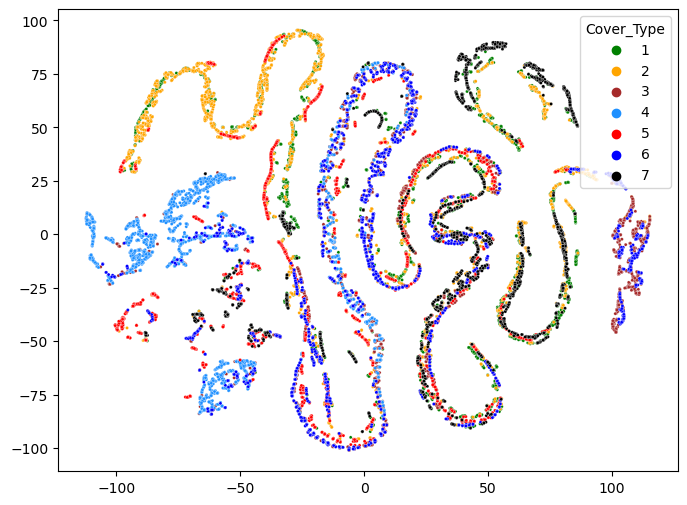

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_repr[:, 0], y=tsne_repr[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()

In [126]:
df_test_ns = df_test.iloc[:,:15]

### Une PCA

In [19]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_ns)

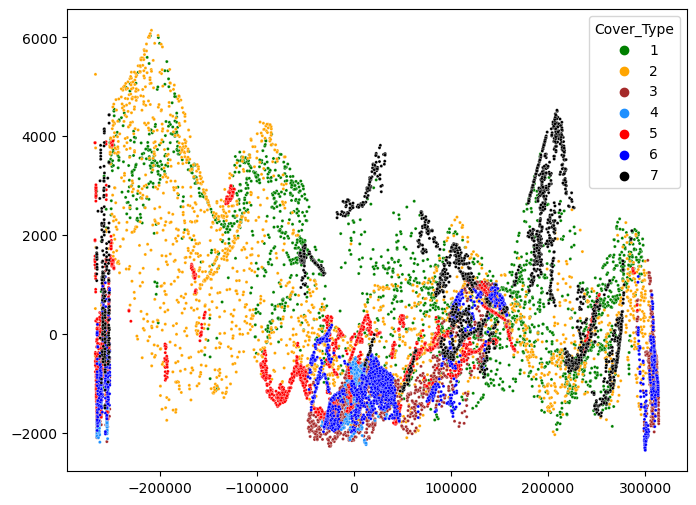

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()
# On voit que les 1 et 2 sont beaucoup plus dispersés que les autres ici, ce qui peut expliquer la difficulté à les prédire

In [21]:
pca.explained_variance_ratio_

array([9.99899594e-01, 7.27579503e-05])

In [ ]:
# On voit que la projection sur une dimension explique 99.99% de la variance (??) ==> A ELUCIDER 

In [22]:
pca2 = PCA(n_components=1)
X_test_10D = pca.fit_transform(df_test)
pca.explained_variance_ratio_
# Pareil pour df_test !

array([9.99867467e-01, 8.17774791e-05])

In [23]:
pca = PCA(n_components=1)
X_1D = pca.fit_transform(X_train_ns)
df_reduced = pd.DataFrame(np.stack([y_train_ns, X_1D.ravel()]).T, columns=["Cover_Type", "1D"])

In [24]:
y_true, y_pred = RF_classif(df_reduced)
accuracy_score(y_true, y_pred) # on arrive à 67% d'accuracy avec une seule dimension !!!!!!

0.6765873015873016

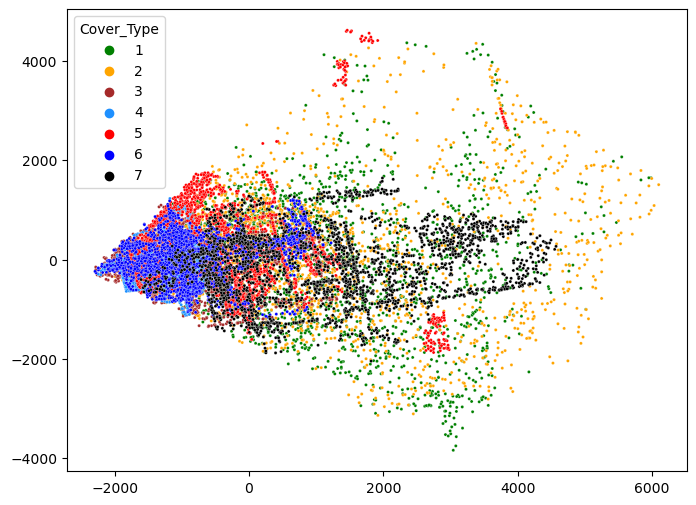

In [25]:
### Si on essaie les ID

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_ns.drop(columns='Id'))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()
# On voit que les 1 et 2 sont beaucoup plus dispersés que les autres ici, ce qui peut expliquer la difficulté à les prédire

In [26]:
pca.explained_variance_ratio_.sum() # Plus réaliste et déjà pas mal

0.9484606688511416

In [27]:
df_reduced = pd.DataFrame(np.c_[y_train_ns, X_2D], columns=["Cover_Type", "1D", "2D"])
y_true, y_pred = RF_classif(df_reduced)
accuracy_score(y_true, y_pred)

0.41633597883597884

In [118]:
# bizarre parce que semble largement déterminé par la scale des features
# (expliqué à 99% pcq échelle des indices de loin supérieure mais ne change rien quand on scale - heureusement pcq pca censée déjà scaler)

### K-means

In [189]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=5, init="k-means++")
y_pred = kmeans.fit_predict(df_train_nosoil.drop(columns=["Cover_Type"]))

In [190]:
pd.Series(y_pred).value_counts()

0    6791
1    4286
2    4043
dtype: int64

In [191]:
pd.Series(kmeans.predict((df_test_ns))).value_counts()

0    229506
2    194419
1    157087
dtype: int64

In [192]:
kmeans.transform(df_test_ns.iloc[0:3])

array([[282008.23857878,  32544.46989751, 491246.89571431],
       [282006.70549159,  32541.34894524, 491245.78019775],
       [282007.28266546,  32516.15172914, 491242.57054947]])

In [184]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_train_nosoil.drop(columns=["Cover_Type"]))
    inertias.append(kmeans.inertia_)

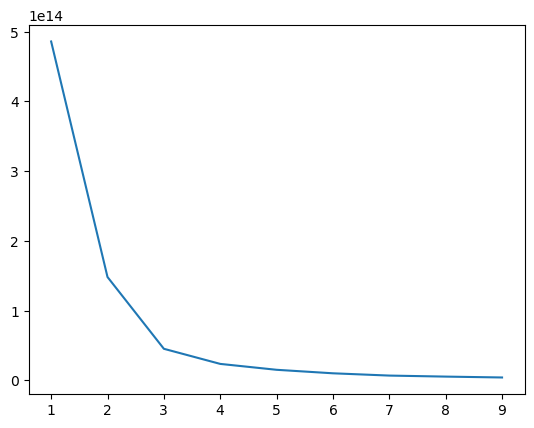

In [185]:
plt.plot(range(1, 10), inertias)

In [186]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_test_ns)
    inertias.append(kmeans.inertia_)

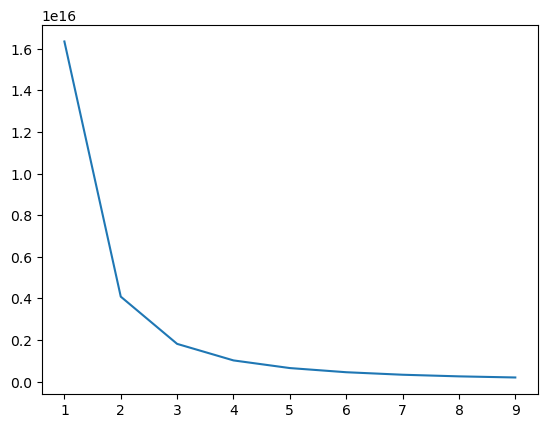

In [188]:
plt.plot(range(1,10), inertias)

In [199]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_train_nosoil.drop(columns=["Cover_Type"]))
    ss.append(silhouette_score(df_train_nosoil.drop(columns=["Cover_Type"]), kmeans.labels_))

2
3
4
5
6
7
8
9


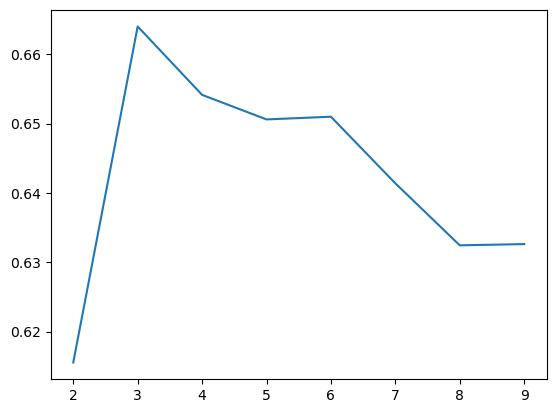

In [200]:
plt.plot(range(2, 10), ss)

2
3
4
5
6
7
8
9


C:\Users\User\AppData\Local\Temp\ipykernel_16124\1151679952.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)


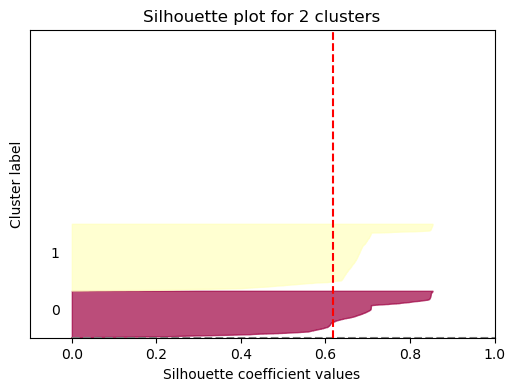

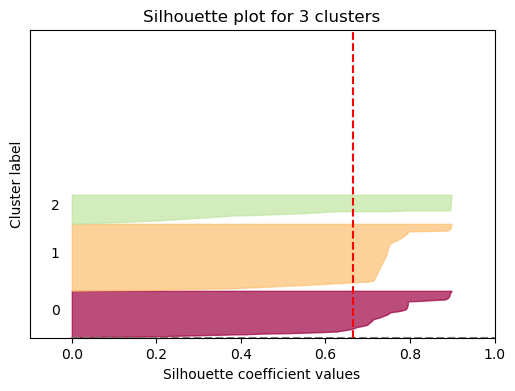

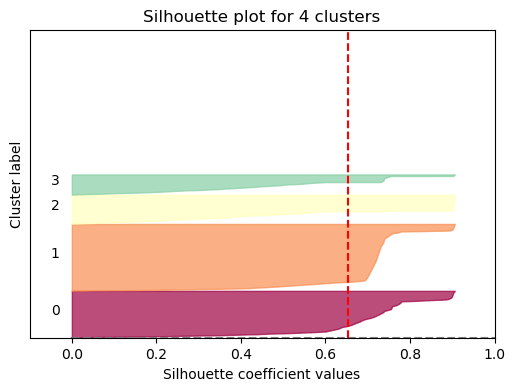

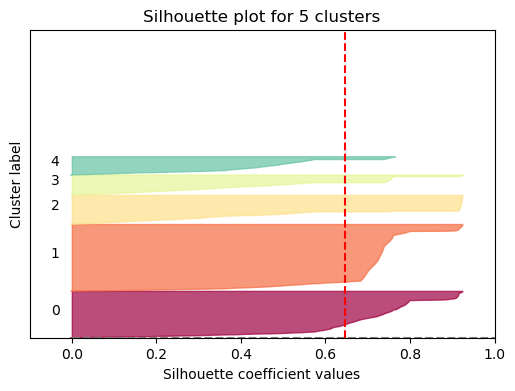

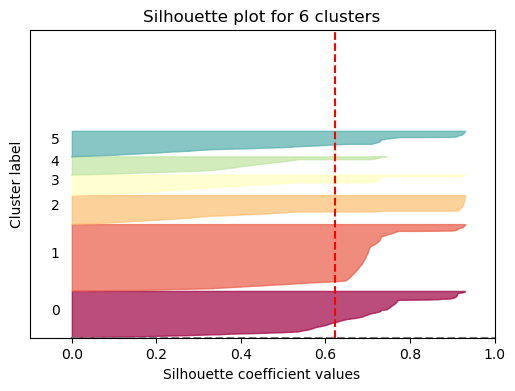

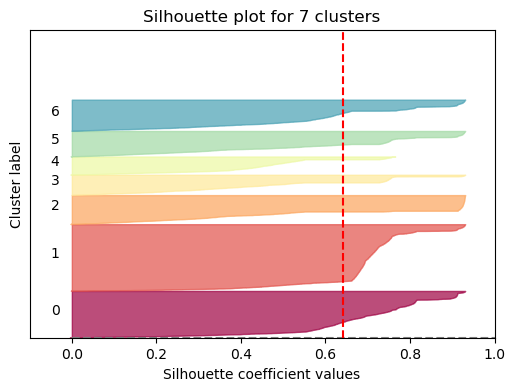

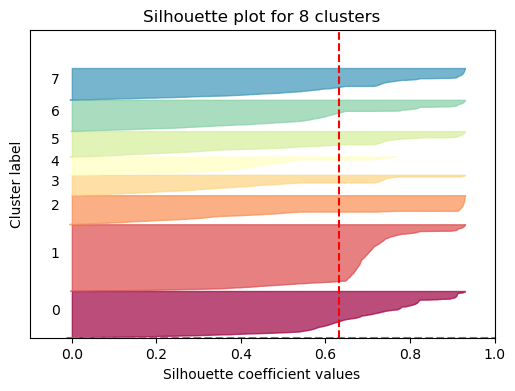

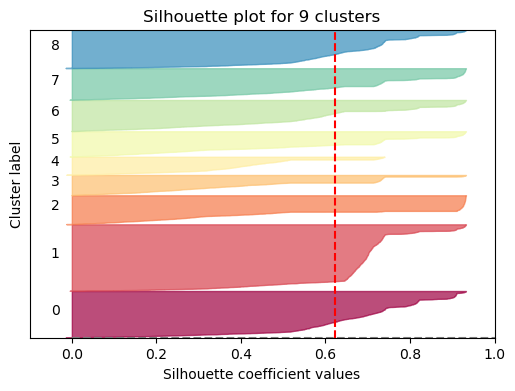

In [203]:
from sklearn.metrics import silhouette_samples

X = df_train_nosoil.drop(columns=["Cover_Type"])
range_n_clusters = range(2, 10)
silhouette_scores = []
sample_silhouette_values = []

for n_clusters in range_n_clusters:
    # Initialize and fit KMeans clustering algorithm
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette values for each sample
    sample_silhouette_values.append(silhouette_samples(X, cluster_labels))

for i, n_clusters in enumerate(range_n_clusters):
    plt.figure(figsize=(6, 4))
    plt.plot([0, 1], [i, i], '--', color='gray')  # Plot silhouette score reference line
    plt.yticks([])  # Clear the y-axis labels
    plt.xlim([-0.1, 1])  # Set the x-axis limits
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])  # Set the y-axis limits
    
    silhouette_values = sample_silhouette_values[i]
    silhouette_values.sort()
    
    y_lower = 10
    for j in range(n_clusters):
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10
    
    plt.title("Silhouette plot for {} clusters".format(n_clusters))
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")  # Plot average silhouette score
    plt.show()

# EACH VARIABLE IN DETAIL

In [13]:
### Note: tout se passe comme si avaient samplé au hasard *de manière à avoir un balanced trained dataset*, 
# ce qui crée les irrégularités observées ci-dessous

- Wilderness Areas

In [14]:
wilderness_types = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]
(df_train[wilderness_types].sum() / len(df_train))

Wilderness_Area1    0.235979
Wilderness_Area2    0.037632
Wilderness_Area3    0.416799
Wilderness_Area4    0.309590
dtype: float64

In [15]:
(df_test[wilderness_types].sum() / len(df_test))

Wilderness_Area1    0.448865
Wilderness_Area2    0.051434
Wilderness_Area3    0.436074
Wilderness_Area4    0.063627
dtype: float64

In [16]:
### On voit que le WA4 est très surreprésenté dans le train vs le test. Inversement, le WA1 est sous-représenté
# => essayer dans un second temps de regarder WA par WA les erreurs

In [17]:
# Lien entre les classes et les  WA

In [18]:
df_train["Wilderness_Area_Synth"] = df_train[wilderness_types] @ [1, 2, 3, 4]

In [19]:
df_train[["Wilderness_Area_Synth"]].value_counts(normalize=True) # creating a new column for visibily (et le oversampling ensuite)

Wilderness_Area_Synth
3                        0.416799
4                        0.309590
1                        0.235979
2                        0.037632
dtype: float64

In [20]:
WA_CT = pd.DataFrame(index=range(1, 5), columns=range(1, 8))
for WA in range(1,5):
    for CT in range(1, 8):
        WA_CT.loc[WA, CT] = len(df_train[(df_train["Wilderness_Area_Synth"] == WA) & (df_train["Cover_Type"] == CT)])

In [21]:
### revenir sur ça plus tard, on voit que la surreprésentatin de W_4 par rapport à 
# W_1 entraîne effectivement bcp moins de classes 1-2 
WA_CT.T

,1,2,3,4
1,1068,237,855,0
2,1105,85,949,21
3,0,0,856,1304
4,0,0,0,2160
5,862,0,1298,0
6,0,0,964,1196
7,533,247,1380,0


- ID

In [22]:
a = 0
for i in df_train["Id"]:
    if i in df_test["Id"]:
        a += 1
print(a)

# les données du train sont contenues dans le full dataset !

15120


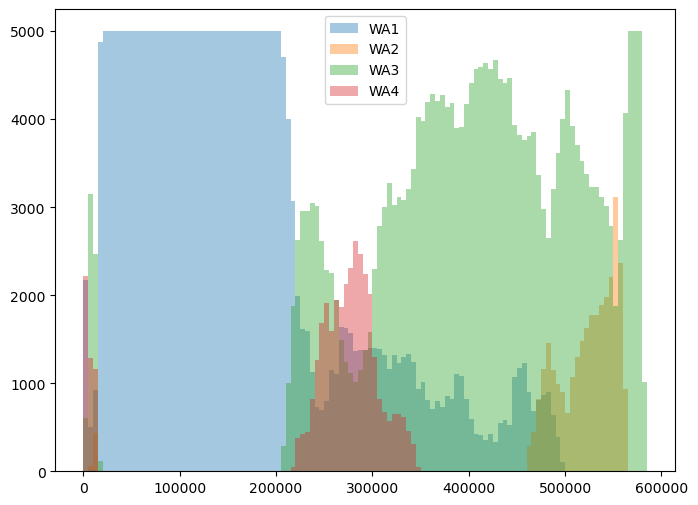

In [23]:
# Répartition des Ids par WA?

binwidth = 5_000

plt.figure(figsize=(8,6))
for i in range (1, 5):
    plt.hist(df_test[df_test[f"Wilderness_Area{i}"] == 1]["Id"], 
             bins=range(1, max(df_test['Id']) + binwidth, binwidth), label=f"WA{i}", alpha=0.4)
    plt.legend()
    
# pour le rapport être nice de représenter ça avec des stacked bars pour voir la proportion sur chaque bin
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

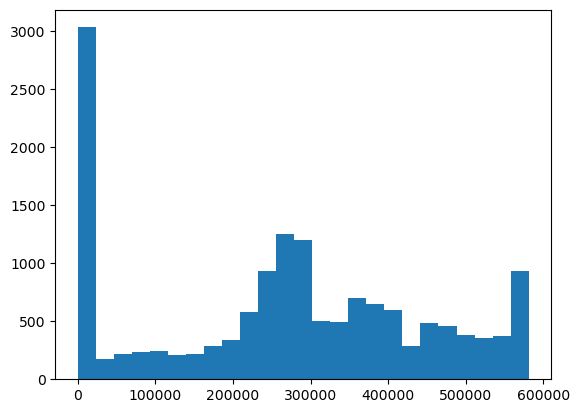

In [24]:
plt.hist(df_train["Id"], bins='auto')
plt.show()
# on voit que on a démesurément pris des Id dans des endroits où le WA est 3 (tout début et milieu)

- Elevation

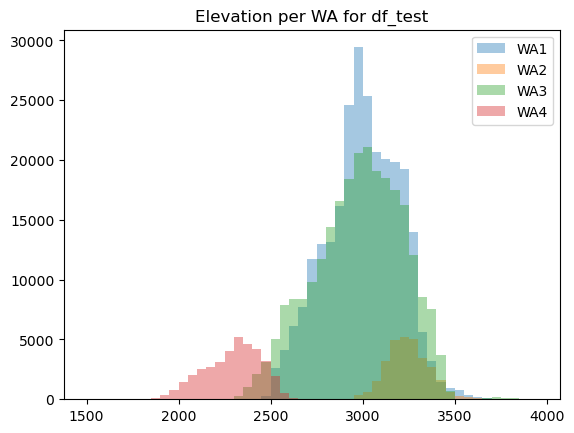

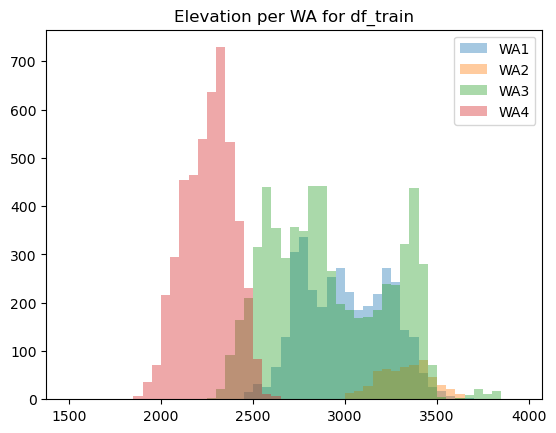

In [25]:
dico = {"df_test": df_test, "df_train": df_train}

for df in dico:
    for i in range(1, 5):
        plt.hist(dico[df][dico[df][f"Wilderness_Area{i}"] == 1]["Elevation"], 
                label=f"WA{i}", alpha=0.4, bins=range(1500, 4000, 50))
    plt.title(f"Elevation per WA for {df}")
    plt.legend()
    plt.show()

In [26]:
### Au delà de la surreprésentation de W4, intéressant de voir que même au sein de WA1 et WA2 on n'a pas samplé uniformément 
# : il manque le pic autour de 3000

- Aspect

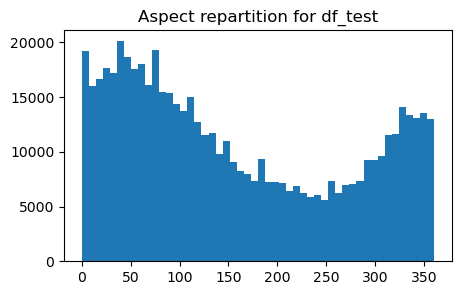

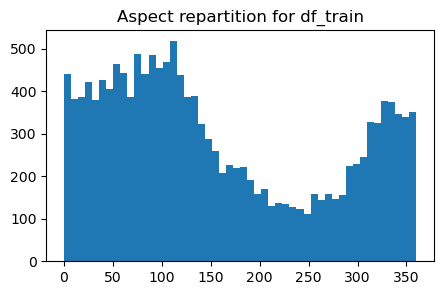

In [27]:
# C'est l'azimuth de la pente, ie en gros l'angle du gradient de la montagne (0° pour pente nord etc)
# logiquement très corrélé avec les hillshades

for df in dico:
    plt.figure(figsize=(5, 3))
    plt.hist(dico[df]["Aspect"], bins=50)
    plt.title(f"Aspect repartition for {df}")
    plt.show()
    
# Ici ok

- Slope

In [28]:
for i, df in enumerate(dico):
    print(i, df)

0 df_test
1 df_train


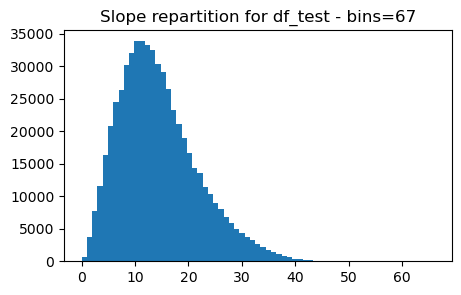

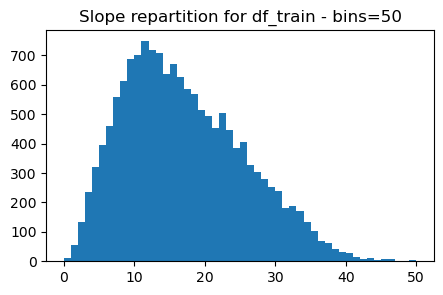

In [29]:
bins = [67, 50]
for df, bin in zip(dico, bins):
    plt.figure(figsize=(5,3))
    plt.hist(dico[df]["Slope"], bins=bin)
    plt.title(f"Slope repartition for {df} - bins={bin}")
    plt.show()


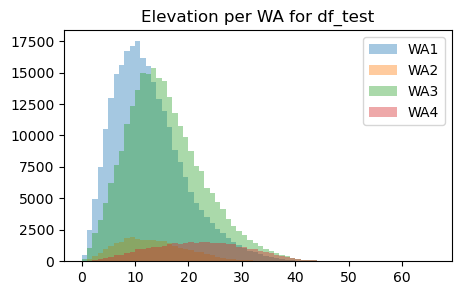

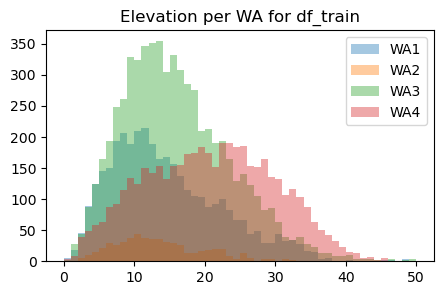

In [30]:
for df in dico:
    plt.figure(figsize=(5,3))
    for i in range(1, 5):
        a = dico[df][dico[df][f"Wilderness_Area{i}"] == 1]["Slope"]
        plt.hist(a, label=f"WA{i}", alpha=0.4, bins=range(min(a), max(a) + 1))
    plt.title(f"Elevation per WA for {df}")
    plt.legend()
    plt.show()

In [31]:
### Les pics observés sur le ydata_profiling sont dûs à des mauvais binages plutôt qu'à un pb dans la donnée
### comportement différent dû à l'absence d'homogénéité dans les WA

- Horizontal distances

In [45]:
distances = ["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways"]

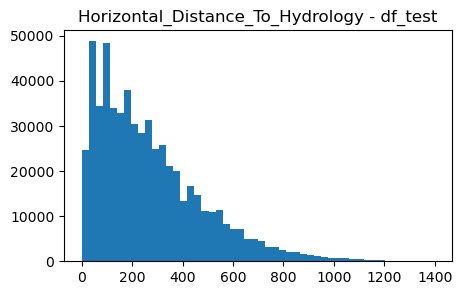

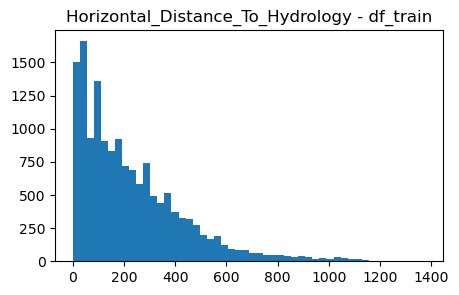

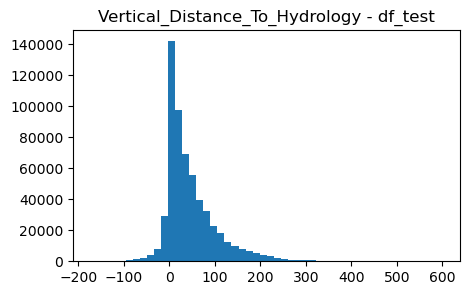

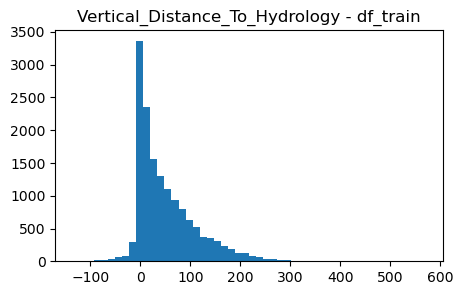

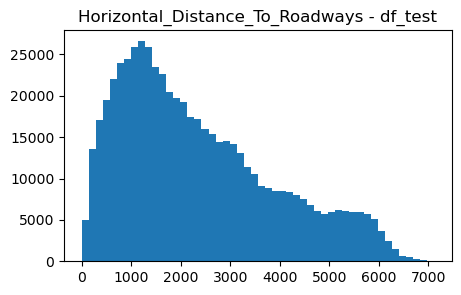

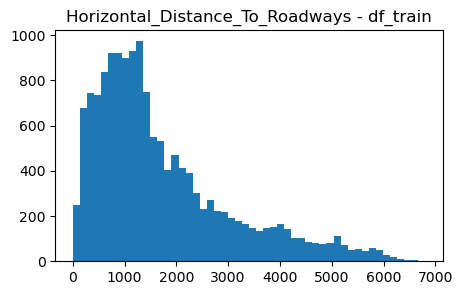

In [74]:
for distance in distances:
    for df in dico:
        plt.figure(figsize=(5, 3))
        plt.hist(dico[df][distance], bins=50)
        plt.title(f"{distance} - {df}")
        plt.show()

In [75]:
# Intérêt de horizontal distance to road? => pas intuitif mais on dirait que utile

In [76]:
df_no_road_dist = df_train.drop(columns="Horizontal_Distance_To_Roadways")

y_true, y_pred = RF_classif(df_no_road_dist)
accuracy_score(y_true, y_pred)

0.8703703703703703

- Hillshade

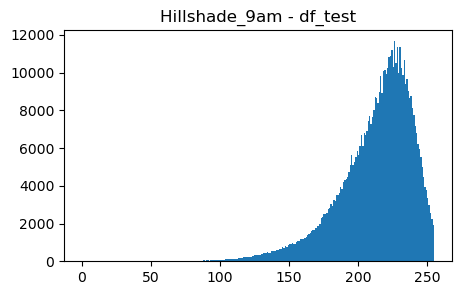

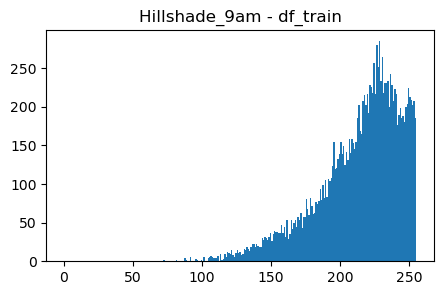

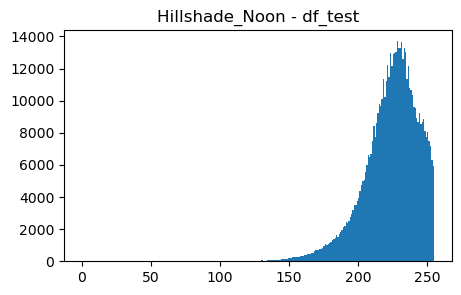

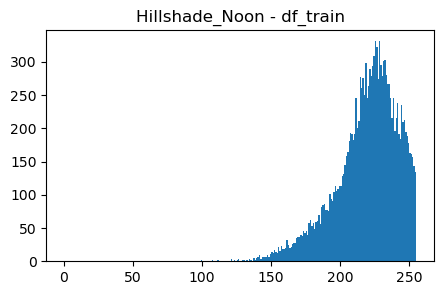

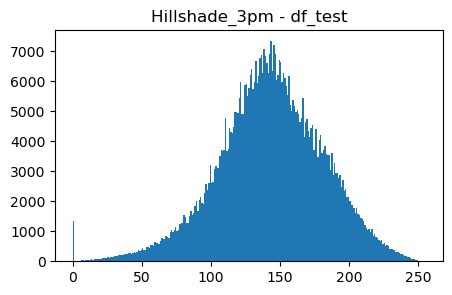

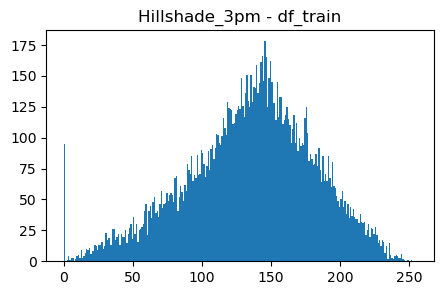

In [77]:
hillshades = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]

for hillshade in hillshades:
    for df in dico:
        plt.figure(figsize=(5, 3))
        plt.hist(dico[df][hillshade], bins=range(256))
        plt.title(f"{hillshade} - {df}")
        plt.show()

- Distance to ignition point

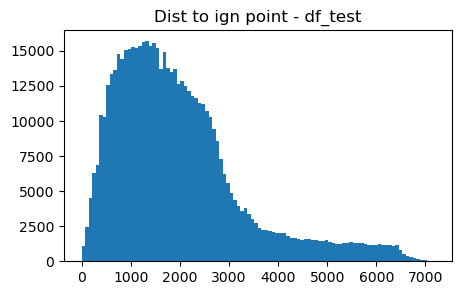

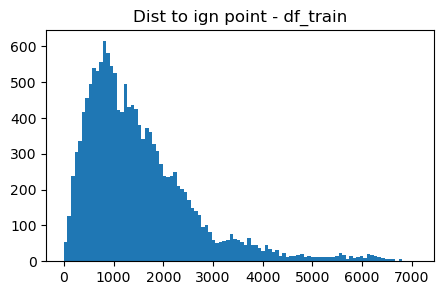

In [79]:
for df in dico:
    plt.figure(figsize=(5, 3))
    plt.hist(dico[df]["Horizontal_Distance_To_Fire_Points"], bins=100)
    plt.title(f"Dist to ign point - {df}")
    plt.show()

- Soil Types

In [81]:
soil_types = ["Soil_Type" + str(i) for i in range(1, 41)]
soils_train = pd.DataFrame(df_train[soil_types].sum() / len(df_train) * 100, columns=["Train"])
soils_test = pd.DataFrame(df_test[soil_types].sum() / len(df_test) * 100, columns=["Test"])

<Axes: >

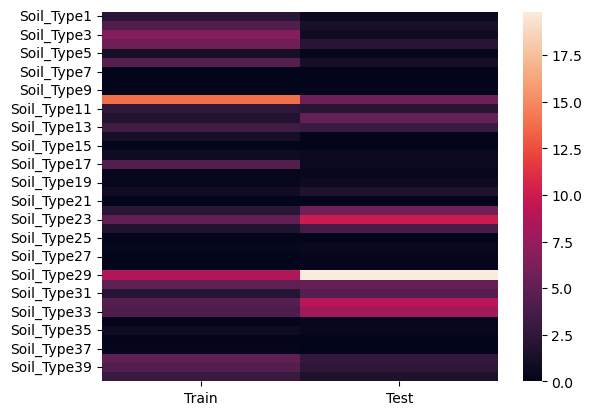

In [82]:
sns.heatmap(pd.merge(soils_train, soils_test, left_index=True, right_index=True))
# Ca ne colle pas, regarder si encore une fois lié aux WAs ou pas

In [83]:
### Certains sont à 5 => si on garde binner tous ceux en dessous de 200 ou qqc comme ça

<Axes: >

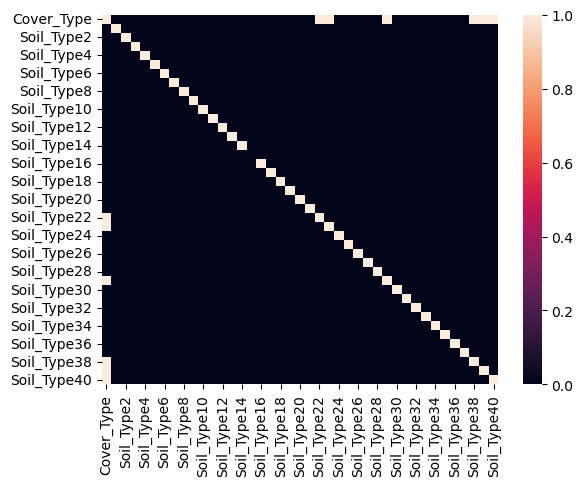

In [84]:
# Y en a-t-il des vraiment corrélés avec Cover type ? Pas beaucoup
sns.heatmap(abs(df_train[["Cover_Type"] + soil_types].corr()) > 0.15)

<Axes: >

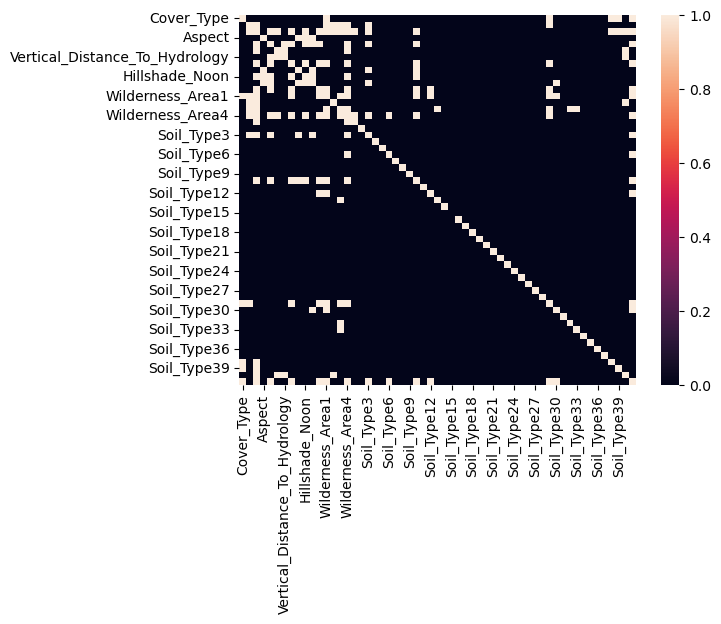

In [85]:
# Et avec les autres ? Pas énormes non plus à part ceux déjà repérés
sns.heatmap(abs(df_train.corr()) > 0.2)

In [86]:
#### Si on essaie sans les soil types

In [87]:
df_train_nosoil = df_train.iloc[:,:16]
y_true, y_pred = RF_classif(df_train_nosoil)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.79      0.80       418
           2       0.83      0.73      0.78       434
           3       0.86      0.84      0.85       425
           4       0.95      0.97      0.96       405
           5       0.88      0.97      0.92       446
           6       0.86      0.87      0.87       440
           7       0.94      0.98      0.96       456

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [88]:
### Ne change rien => faire sans pour l'instant, on verra ensuite comment biner

### Binning soil types

In [101]:
binned_soils = []

for soil in soil_types:
    if sum(df_train[soil]) < 200:
        binned_soils.append(soil)

In [108]:
def _soil_binned(X, binned_soils=binned_soils):
    X = X.copy()
    X['Soil_others'] = np.sum(X[binned_soils], axis=1)
    X.drop(columns=binned_soils, inplace=True)
    return X

In [123]:
y_true, y_pred = RF_classif(_soil_binned(df_train))
accuracy_score(y_true, y_pred)

0.888558201058201

In [124]:
# ne change pas grand chose mais probablement plus propre

In [125]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.79      0.81       432
           2       0.81      0.73      0.77       424
           3       0.90      0.87      0.88       424
           4       0.93      0.98      0.96       420
           5       0.91      0.97      0.94       426
           6       0.87      0.90      0.89       435
           7       0.95      0.98      0.96       463

    accuracy                           0.89      3024
   macro avg       0.89      0.89      0.89      3024
weighted avg       0.89      0.89      0.89      3024



# Over/undersampling

In [30]:
# on peut essayer d'undersampler wilderness area 4 
# pcq à ce stade il semblerait que a été tiré uniformément dans les wilderness areas

# ou alors oversampler tous les autres pour aboutir à des proportions similaires à celles d'origine

# Ou alors oversampler directement des classes (ex 1 et 2 mais peut être problématique)

### Undersampling WA4

In [31]:
# How much class 4 do we want
0.08 * len(df_train) * 0.8

967.6800000000002

In [32]:
### UNDERSAMPLING W4

from imblearn.under_sampling import RandomUnderSampler

# Separating train and test
X = df_train.drop('Cover_Type', axis=1)
y = df_train['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Reuniting data_train and target_train
data_train = pd.concat([X_train, pd.DataFrame(y_train, columns=['Cover_Type'])], axis=1)

# Define the under-sampler
under_sampler = RandomUnderSampler(sampling_strategy={4: 1000})

# Undersampling on the wilderness area
X_try = data_train.drop('Wilderness_Area_Synth', axis=1)
y_try = data_train["Wilderness_Area_Synth"]
X_resampled, _ = under_sampler.fit_resample(X_try, y_try)
X_resampled = pd.DataFrame(X_resampled, columns=X_try.columns)

# Finalizing on the columns 
X_train_synth = X_resampled.drop('Cover_Type', axis=1)
y_train_synth = X_resampled["Cover_Type"]
X_test = X_test.drop('Wilderness_Area_Synth', axis=1)

In [33]:
X_train_synth[wilderness_types].sum()

Wilderness_Area1    2857
Wilderness_Area2     466
Wilderness_Area3    5038
Wilderness_Area4    1000
dtype: int64

In [34]:
y_true, y_pred = RF_classif_train_test(X_train_synth, y_train_synth, X_test, y_test)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.80      0.80       444
           2       0.82      0.70      0.76       451
           3       0.80      0.80      0.80       444
           4       0.92      0.98      0.95       439
           5       0.91      0.96      0.93       412
           6       0.82      0.81      0.82       424
           7       0.94      0.97      0.95       410

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



In [35]:
### => Ne semble pas très concluant à priori mais à tester sur le Kaggle

### Oversampling WA1 

In [36]:
data_train["Wilderness_Area_Synth"].value_counts()

3    5038
4    3735
1    2857
2     466
Name: Wilderness_Area_Synth, dtype: int64

In [37]:
WA_proportions = {1: 0.45,
               2: 0.05,
               3: 0.44,
               4: 0.06}

ovs_strat = {1: 20_000, 3:20_000}

In [38]:
### OVERSAMPLING W1

from imblearn.over_sampling import ADASYN

# Separating train and test
X = df_train.drop('Cover_Type', axis=1)
y = df_train['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Reuniting data_train and target_train
data_train = pd.concat([X_train, pd.DataFrame(y_train, columns=['Cover_Type'])], axis=1)

# Define the under-sampler
adasyn = ADASYN(sampling_strategy=ovs_strat)

# Undersampling on the wilderness area
X_try = data_train.drop('Wilderness_Area_Synth', axis=1)
y_try = data_train["Wilderness_Area_Synth"]
X_resampled, _ = adasyn.fit_resample(X_try, y_try)
X_resampled = pd.DataFrame(X_resampled, columns=X_try.columns)

# Finalizing on the columns 
X_train_synth = X_resampled.drop('Cover_Type', axis=1)
y_train_synth = X_resampled["Cover_Type"]
X_test = X_test.drop('Wilderness_Area_Synth', axis=1)

In [39]:
y_train_synth.value_counts()

1    14412
2     8019
5     6043
7     4607
3     3922
4     3770
6     3332
Name: Cover_Type, dtype: int64

In [40]:
y_true, y_pred = RF_classif_train_test(X_train_synth, y_train_synth, X_test, y_test)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.84      0.83       438
           2       0.81      0.71      0.76       423
           3       0.86      0.85      0.85       422
           4       0.94      0.98      0.96       429
           5       0.89      0.95      0.92       426
           6       0.88      0.88      0.88       433
           7       0.97      0.97      0.97       453

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [41]:
### Pas très net non plus mais on voit qu'on prédit mieux C1 quand même...

### Combining under and oversampler

In [42]:
ovs_strat = {1: 20_000, 3:20_000}
uds_strat = {4: 1000}

In [43]:
from imblearn.pipeline import Pipeline

# Separating train and test
X = df_train.drop('Cover_Type', axis=1)
y = df_train['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Reuniting data_train and target_train
data_train = pd.concat([X_train, pd.DataFrame(y_train, columns=['Cover_Type'])], axis=1)

# Define the under-over-sampler
pipeline = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy=uds_strat)), 
    ('over', ADASYN(sampling_strategy=ovs_strat))  
])

# Undersampling on the wilderness area
X_try = data_train.drop('Wilderness_Area_Synth', axis=1)
y_try = data_train["Wilderness_Area_Synth"]
X_resampled, _ = pipeline.fit_resample(X_try, y_try)
X_resampled = pd.DataFrame(X_resampled, columns=X_try.columns)

# Finalizing on the columns 
X_train_synth = X_resampled.drop('Cover_Type', axis=1)
y_train_synth = X_resampled["Cover_Type"]
X_test = X_test.drop('Wilderness_Area_Synth', axis=1)

In [44]:
X_train_synth[wilderness_types].sum()

Wilderness_Area1    20026
Wilderness_Area2      454
Wilderness_Area3    20093
Wilderness_Area4     1000
dtype: int64

In [45]:
y_train_synth.value_counts()

1    15353
2     8057
5     5565
7     4572
3     3118
6     2541
4     2367
Name: Cover_Type, dtype: int64

In [46]:
### Pb on n'arrive pas aux proportions prédites dans le dataset test
# alors essayer de travailler directement sur Cover_Type plutôt que WA?

### Working directly on the Cover Type

In [47]:
predictions_df["Cover_Type"].value_counts() / len(predictions_df)

2    0.406381
1    0.372326
3    0.065709
7    0.054503
5    0.048923
6    0.045228
4    0.006929
Name: Cover_Type, dtype: float64

In [48]:
df_train["Cover_Type"].value_counts() / len(df_train)

1    0.142857
2    0.142857
3    0.142857
4    0.142857
5    0.142857
6    0.142857
7    0.142857
Name: Cover_Type, dtype: float64

In [49]:
### OVERSAMPLING CLASS 2 AND 1

ovs_strat = {1: 15_000, 2: 15_000}

# Separating train and test
X = df_train.drop('Cover_Type', axis=1)
y = df_train['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Define the over-sampler
adasyn = ADASYN(sampling_strategy=ovs_strat)

# Oversampling
X_train_synth, y_train_synth = adasyn.fit_resample(X_train, y_train)
X_train_synth = pd.DataFrame(X_train_synth, columns=X_train.columns)

In [50]:
y_train_synth.value_counts() / len(y_train_synth)

2    0.389172
1    0.386472
6    0.045551
4    0.044773
7    0.044773
5    0.044747
3    0.044513
Name: Cover_Type, dtype: float64

In [51]:
X_train_synth["Wilderness_Area_Synth"].value_counts() / len(X_train_synth)

3    0.429713
1    0.351381
2    0.120120
4    0.098785
Name: Wilderness_Area_Synth, dtype: float64

In [52]:
y_true, y_pred = RF_classif_train_test(X_train_synth, y_train_synth, X_test, y_test)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.82      0.81       435
           2       0.74      0.76      0.75       433
           3       0.87      0.84      0.85       445
           4       0.95      0.97      0.96       435
           5       0.92      0.90      0.91       436
           6       0.86      0.85      0.85       405
           7       0.96      0.95      0.95       435

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [53]:
# Par rapport à avant, améliore le recall (moins de faux négatifs) mais diminue la précision (plus de faux positifs)

y_true, y_pred = RF_classif(df_train)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.78      0.78       443
           2       0.80      0.70      0.74       430
           3       0.85      0.87      0.86       396
           4       0.93      0.98      0.95       434
           5       0.90      0.97      0.93       423
           6       0.91      0.87      0.89       464
           7       0.94      0.97      0.95       434

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.88      0.87      3024



### Trying

In [54]:
### TEST

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_synth.drop(columns="Wilderness_Area_Synth"), y_train_synth)

# Make predictions on the test dataset
y_pred = clf.predict(df_test)

# Saving predictions to a CSV file
predictions_df = pd.DataFrame({'Cover_Type': y_pred})

# Having it fit the desired format
Id = [i for i in range (1, 581013)]
predictions_df['Id'] = Id
predictions_df.to_csv('test_predictions.csv', index=False) # peut-être plus simple de directement mettre index = True

In [55]:
## on atteint 0.82 => Amélioration légère

# Essayer de le faire de manière plus méthodique, en augmentant encore plus et notamment le WA1,
# et en tunant : on dirait que en fonction du fit du ADASYN on a des résultats assez différents

In [56]:
predictions_df["Cover_Type"].value_counts()

2    249693
1    220463
3     35628
7     27143
6     23721
5     20283
4      4081
Name: Cover_Type, dtype: int64

In [57]:
# On remarque que on a sensiblement plus de classe 2 prédite ici que à la base

In [58]:
y_pred = clf.predict(data_train.drop(columns=["Wilderness_Area_Synth", "Cover_Type"]))
accuracy_score(y_pred, data_train["Cover_Type"])

0.9753637566137566

# Function to treat train and test separately

In [76]:
def clean_predictor(y_pred, df_test=df_test, df_train=df_train):
    predictions_df = pd.DataFrame({'Cover_Type': y_pred})
    predictions_df['Id'] = range(1, len(df_test) + 1)
    
    # Removing those in df_train
    predictions_df.drop(predictions_df[predictions_df["Id"].isin(df_train["Id"])].index, inplace=True)
    
    # Adding df_train instead
    predictions_df = pd.concat([df_train[['Cover_Type', 'Id']], predictions_df], axis=0, ignore_index=True)

    # Sorting by Id (just in case)
    predictions_df.sort_values("Id", inplace=True)
    
    return predictions_df